In [156]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn.base import clone
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
def polynomial_dataframe(feature, degree):
    poly_dataframe = pd.DataFrame()
    poly_dataframe['power_1'] = feature
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_'.format(power)
            poly_dataframe['power_{}'.format(power)] = np.power(feature, power)
    return poly_dataframe

In [64]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [65]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living', 'price'])

In [66]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000,0,0.00,290,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
15381,2856101479,20140701T000000,276000,1,0.75,370,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000
860,1723049033,20140620T000000,245000,1,0.75,380,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
18379,1222029077,20141029T000000,265000,0,0.75,384,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341
4868,6896300380,20141002T000000,228000,0,1.00,390,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000


In [118]:
poly1_data = polynomial_dataframe(sales['sqft_living'], 15)
poly1_data['price'] = sales['price']

In [126]:
degree = 15
features = ['power_{}'.format(i) for i in range(1, degree+1)]

In [127]:
m = LR()
m.fit(poly1_data[features], poly1_data['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

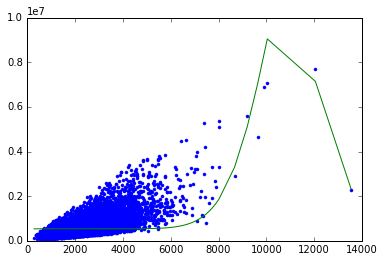

In [128]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.', poly1_data['power_1'], 
         m.predict(poly1_data[features]), '-')

In [129]:
# SUBSET
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)
set_1 = set_1.sort_values(['sqft_living', 'price'])
set_2 = set_2.sort_values(['sqft_living', 'price'])
set_3 = set_3.sort_values(['sqft_living', 'price'])
set_4 = set_4.sort_values(['sqft_living', 'price'])

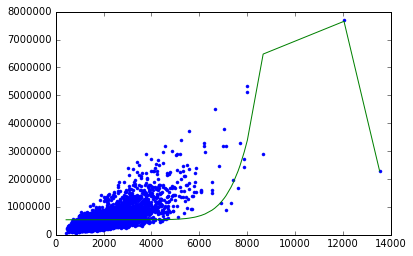

In [131]:
set1_data = polynomial_dataframe(set_1['sqft_living'], degree)
set1_data['price'] = set_1['price']
m_1 = LR()
m_1.fit(set1_data[features], set1_data['price'])
plt.plot(set1_data['power_1'],set1_data['price'],'.', set1_data['power_1'], 
         m_1.predict(set1_data[features]), '-')

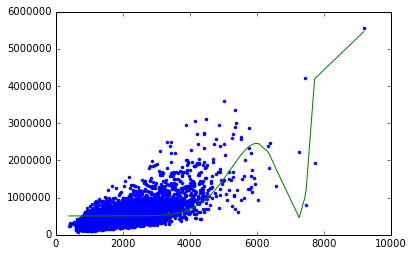

In [132]:
set2_data = polynomial_dataframe(set_2['sqft_living'], degree)
set2_data['price'] = set_2['price']
m_2 = LR()
m_2.fit(set2_data[features], set2_data['price'])
plt.plot(set2_data['power_1'],set2_data['price'],'.', set2_data['power_1'], 
         m_2.predict(set2_data[features]), '-')

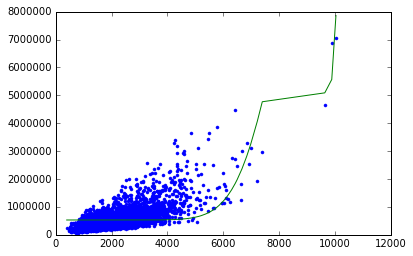

In [133]:
set3_data = polynomial_dataframe(set_3['sqft_living'], degree)
set3_data['price'] = set_3['price']
m_3 = LR()
m_3.fit(set3_data[features], set3_data['price'])
plt.plot(set3_data['power_1'],set3_data['price'],'.', set3_data['power_1'], 
         m_3.predict(set3_data[features]), '-')

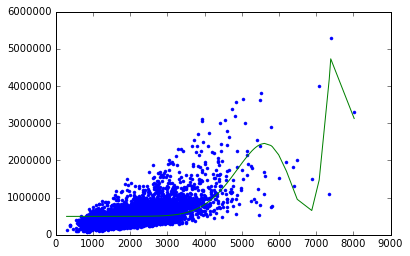

In [134]:
set4_data = polynomial_dataframe(set_4['sqft_living'], degree)
set4_data['price'] = set_4['price']
m_4 = LR()
m_4.fit(set4_data[features], set4_data['price'])
plt.plot(set4_data['power_1'],set4_data['price'],'.', set4_data['power_1'], 
         m_4.predict(set4_data[features]), '-')

In [138]:
#Quiz 1
m_1.coef_[14]

2.1864111641752804e-52

In [139]:
m_2.coef_[14]

-1.9719924134899006e-49

In [140]:
m_3.coef_[14]

3.4313293205312183e-51

In [141]:
m_4.coef_[14]

-6.0916341393503873e-49

In [102]:
training_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype=dtype_dict)
validation_data = pd.read_csv('wk3_kc_house_valid_data.csv', dtype=dtype_dict)
test_data = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [182]:
m = LR()
current_min = None
min_idx = None
for d in range(1, 16):
    features = ['power_{}'.format(i) for i in range(1, d+1)]
    data_set = polynomial_dataframe(training_data['sqft_living'], d)
    data_set['price'] = training_data['price']
    m.fit(data_set[features], data_set['price'])
    
    val_data_set = polynomial_dataframe(validation_data['sqft_living'], d)
    val_data_set['price'] = validation_data['price']
    errors = m.predict(val_data_set[features]) - val_data_set['price']
    if not current_min:
        current_min = np.sum(np.square(errors))
        min_idx = d
    else:
        current_min = min(current_min, np.sum(np.square(errors)))
        if current_min == np.sum(np.square(errors)):
            min_idx = d

629097886299587.5
623955062706519.1
625820280251530.6
629987341468499.8
628240679314420.1
566268593934055.4
1073845792802396.4
7087731525068574.0
4.530345223846548e+16
2.4756862412990218e+17
1.1938014792150927e+18
5.093260375057893e+18
7.616230021287873e+17
2.297560925006345e+18
6.955038097243386e+18


In [180]:
min_idx

6

In [193]:
test_m = LR()
features = ['power_{}'.format(i) for i in range(1, min_idx+1)]
data_set = polynomial_dataframe(training_data['sqft_living'], min_idx)
data_set['price'] = training_data['price']
test_m.fit(data_set[features], data_set['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [204]:
test_data_set = polynomial_dataframe(test_data['sqft_living'], min_idx)
test_data_set['price'] = test_data['price']
errors = test_m.predict(test_data_set[features]) - test_data_set['price']

In [205]:
np.sum(np.square(errors))

135225114656622.75